In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#for generating random values using numpy library
#you have to use np.random library
experience = np.random.randint(low=2,high=11,size=500) #generating random values for experience

(array([53., 51., 57., 55.,  0., 56., 48., 58., 49., 73.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

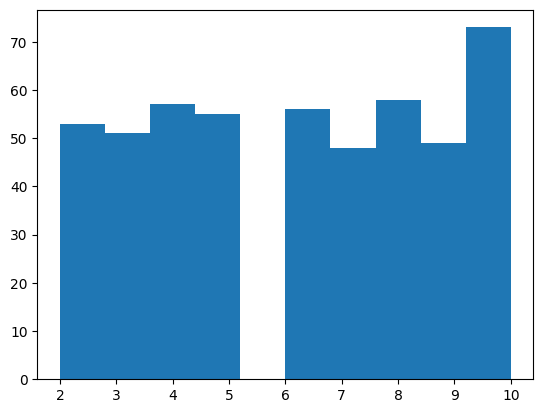

In [3]:
plt.hist(experience)

In [4]:
salary = 2*experience + 3 + np.random.normal(loc=0,scale=2.5,size=500)

Text(0, 0.5, 'Salary in Lakhs (y)')

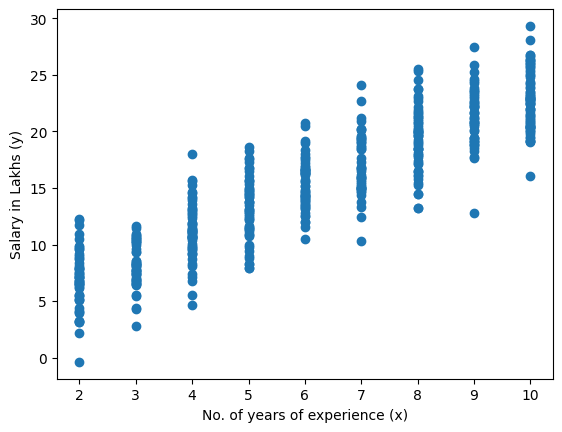

In [5]:
plt.scatter(experience,salary)
plt.xlabel("No. of years of experience (x)")
plt.ylabel("Salary in Lakhs (y)")


In [6]:
salary

array([ 7.33028196, 10.19499287, 17.74865652, 13.95569804, 14.94157168,
       23.31071348, 10.72313467,  5.53822025, 17.48883927, 10.59108915,
       11.64837971,  8.80558865,  8.19044201, 23.47950886, 10.30809246,
        8.74245745, 20.05235807,  3.16660033, 10.88649807, 19.09105803,
       20.80972351,  2.77518634, 25.44172086,  8.30587375, 13.71921977,
       27.45863286, 23.59155696,  6.48766339, 16.14624954,  7.35772418,
       17.31040022,  7.9184901 , 21.44777062, 16.32159574, 24.68002359,
       21.06562758, 15.57551457, 21.30081763, 21.10364223, 17.38838245,
       22.8876639 ,  8.34580191, 26.28164173, 14.91125544, 10.46005266,
       26.28268162, 13.73110397, 20.65003616, 18.97724573, 17.74829559,
       20.56030466,  7.60283576, 15.35980406, 10.48460253,  9.02595838,
       24.82867102, 22.70638078, 10.90331271,  9.47816993, 12.79608565,
       23.64872553, 10.67530638, 18.95484812,  8.18448384, 19.1520471 ,
        7.44176725, 16.05302217, 15.40839289, 25.26232408, 10.45

In [7]:
training_data = pd.DataFrame(data={"x(experience)":experience,"y/(salary)":salary})

In [8]:
training_data

,x(experience),y/(salary)
0,2,7.330282
1,3,10.194993
2,8,17.748657
3,4,13.955698
4,7,14.941572
...,...,...
495,4,10.891610
496,2,4.409818
497,8,17.929015
498,3,6.776978


In [9]:
x=np.array(training_data["x(experience)"])
y=np.array(training_data["y/(salary)"])


In [10]:
np.shape(x)

(500,)

In [11]:
def nll(theta0,theta1):
    
    x = np.array(training_data["x(experience)"])
    y=np.array(training_data["y/(salary)"])
    mu_y_condition_x = theta0 + (theta1*x)
    squared_error = (y - mu_y_condition_x)**2
    mse = np.mean(squared_error)
    return (1/2)*mse
     

In [12]:
def del_by_del_theta(theta0_initial,theta1_initial):

    x = np.array(training_data["x(experience)"])
    y=np.array(training_data["y/(salary)"])

    mu_y_condition_x = theta0_initial + (theta1_initial*x)
    error = mu_y_condition_x - y 
    #error = np.reshape(error,(500,1))
    #or
    error = error.reshape(500,1)     #used to make it a matrix by adding a dimention (500,)->(500,1) 
    #or
    #error = np.expand_dims(error,-1)  
    error_transpose = np.transpose(error)
    x = np.expand_dims(x,-1)
    #print(np.shape(x))

    del_by_del_theta1 = (1/error.shape[0])*np.matmul(error_transpose,x)
    del_by_del_theta0 = (np.mean(error))

    return [del_by_del_theta0, del_by_del_theta1]

In [13]:
epsilon = 10**(-2)
epoch_counter = 0
theta0_initial = 0
theta1_initial = 0
tol = 10**(-7)

while True:

    initial_gradients = del_by_del_theta(theta0_initial,theta1_initial)

    theta0_final = theta0_initial - (epsilon * initial_gradients[0])
    theta1_final = theta1_initial - (epsilon * initial_gradients[1])

    nll_initial_value = nll(theta0_initial,theta1_initial)
    nll_final_value = nll(theta0_final,theta1_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    theta0_initial = theta0_final
    theta1_initial = theta1_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

print("Final Theta0 = {}, Final Theta1 = {}".format(theta0_final,theta1_final))
    

Epoch # 1, NLL Value = 134.99552444833574
Epoch # 2, NLL Value = 42.752612964267726
Epoch # 3, NLL Value = 15.314288425759667
Epoch # 4, NLL Value = 7.151849084637702
Epoch # 5, NLL Value = 4.722952815991121
Epoch # 6, NLL Value = 3.999480576509462
Epoch # 7, NLL Value = 3.7832834074199955
Epoch # 8, NLL Value = 3.7179763711298044
Epoch # 9, NLL Value = 3.6975540910459075
Epoch # 10, NLL Value = 3.690485654921602
Epoch # 11, NLL Value = 3.68739230151844
Epoch # 12, NLL Value = 3.6854843441227594
Epoch # 13, NLL Value = 3.6839319916317352
Epoch # 14, NLL Value = 3.6824884165925846
Epoch # 15, NLL Value = 3.6810801919387277
Epoch # 16, NLL Value = 3.6796854679281124
Epoch # 17, NLL Value = 3.6782977363289033
Epoch # 18, NLL Value = 3.6769150522118994
Epoch # 19, NLL Value = 3.6755368280129095
Epoch # 20, NLL Value = 3.6741628799384998
Epoch # 21, NLL Value = 3.672793144322862
Epoch # 22, NLL Value = 3.671427593259157
Epoch # 23, NLL Value = 3.6700662095042667
Epoch # 24, NLL Value = 3.66

In [16]:
x_experience = 15
predicted_salary = theta0_final + theta1_final * x_experience
predicted_salary

array([[33.41343498]])

In [15]:
# import ipywidgets as widgets
# from IPython.display import display

# # Create widgets
# experience_slider = widgets.IntSlider(value=4, min=2, max=10, step=1, description='Experience:')
# output = widgets.Output()

# # Define the function to update the predicted salary
# def update_prediction(change):
#     x_experience = change['new']
#     predicted_salary = theta0_final + theta1_final * x_experience
#     with output:
#         output.clear_output()
#         print(f"Predicted Salary for {x_experience} years of experience: {predicted_salary[0][0]:.2f} Lakhs")

# # Attach the function to the slider
# experience_slider.observe(update_prediction, names='value')

# # Display the widgets
# display(experience_slider, output)

# # Initial prediction
# update_prediction({'new': experience_slider.value})